# Matplotlib bar chart storytelling

In [ ]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [5]:
df_quantity_brand = duckdb.query(
    """--sql
    SELECT make as Brand, 
    SUM(quantity) AS Quantity
    FROM 
        df 
    GROUP BY 
        Brand
    ORDER BY 
        Quantity DESC;
    """
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Koenigsegg,1.0
Secma,1.0
Martin Motors,1.0


## Bar charts

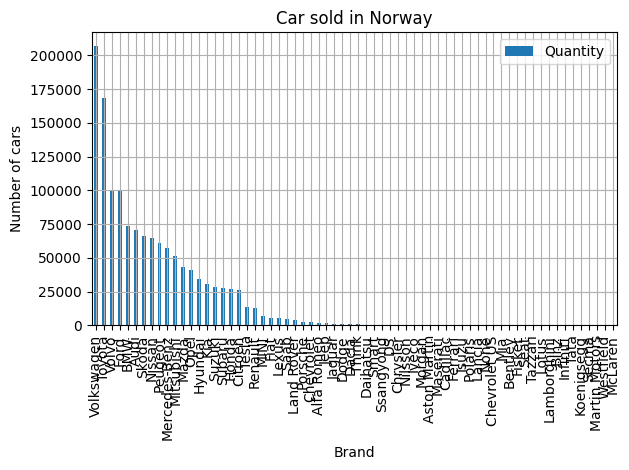

In [9]:
ax = df_quantity_brand.plot(kind= "bar", title= "Car sold in Norway", ylabel= "Number of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_initial.png")